#Check Point 1 ( Data Cleaning )

##Loading the Data 

In [414]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [415]:
#import data
companies=pd.read_csv(r'https://cdn.upgrad.com/uploads/production/ad4b085e-a223-4bfd-aeb4-78cb217face3/companies.csv', encoding= 'palmos')
rounds2=pd.read_csv(r'https://cdn.upgrad.com/UpGrad/temp/4c3b5ed0-e5dc-4838-89a2-173d8707d857/rounds2.csv', encoding= 'palmos')

In [416]:
#understanding the data
print(companies.head(5))
print(companies.info())
print(companies.isnull().sum())

                             permalink  ...  founded_at
0                  /Organization/-Fame  ...         NaN
1               /Organization/-Qounter  ...  04-09-2014
2  /Organization/-The-One-Of-Them-Inc-  ...         NaN
3                /Organization/0-6-Com  ...  01-01-2007
4       /Organization/004-Technologies  ...  01-01-2010

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(1

##### Table 1.1 sl .no 1 and .no 2

In [417]:
#cleaning the Data

#matching the case (standerdize the columns)

companies.permalink=companies.permalink.apply(lambda x: x.lower())
rounds2.company_permalink=rounds2.company_permalink.apply(lambda x: x.lower())

#find unique values Table 1.1 sl .no 1

print('Total number of unique companies in rounds2 file is ',rounds2['company_permalink'].nunique())
print('Total number of unique companies in companies file is ',companies['permalink'].nunique())
# print(companies.groupby(list(companies)).size().reset_index(name='Count').size)
# print(rounds2.groupby(list(rounds2)).size().reset_index(name='Count').size)

Total number of unique companies in rounds2 file is  66368
Total number of unique companies in companies file is  66368


##### Table 1.1 sl .no 3


In the companies dataframe column **permalink** can be used as unique key

##### Table 1.1 sl .no 4

In [418]:
#if rounds2 have companies that are not in companies csv 

#find the difference
a=set(companies.permalink.tolist())
b=set(rounds2.company_permalink.tolist())
z=b.difference(a)
ans=lambda :'Yes' if len(list(z))>0 else 'No'
print("Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.",ans())
#print(z)


Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N. No


##### Table 1.1 sl .no 5

In [419]:
#merge the two data frame
#first changing the column name and do indexing to ease the process 

companies.set_index('permalink')
rounds2=rounds2.rename(columns={'company_permalink':'permalink'})
rounds2.set_index('permalink')

# merging the tables 
master_frame=pd.merge(companies,rounds2,on='permalink')
master_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  funding_round_permalink  114949 non-null  object 
 11  funding_round_type       114949 non-null  object 
 12  funding_round_code       31140 non-null   object 
 13  funded_at                114949 non-null  object 
 14  rais

#Check Point 2 ( Funding Type Analysis )


##### Table 2.1 sl .no 1,2,3,4 
Average Values of Investments for Each of these Funding Types

###### before checking the average value we will **Clean Data** and check for outliers 

In [420]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [421]:
# Drop the columns which are not in use for further analysis
master_frame = master_frame.drop(['homepage_url','state_code','region','city','funding_round_code','founded_at'], axis=1)

#show null in percentage
print(round(100 *(master_frame.isnull().sum()/len(master_frame)) , 2))

permalink                  0.00
name                       0.00
category_list              2.97
status                     0.00
country_code               7.55
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64


In [422]:
# fill the missing raised_amount_usd with median as 17.39 is enough to influence the analysis we shall not drop it.
master_frame.raised_amount_usd=master_frame.raised_amount_usd.fillna(master_frame.raised_amount_usd.quantile(q=0.50))
#show null in percentage
print(round(100 *(master_frame.isnull().sum()/len(master_frame)) , 2))

permalink                 0.00
name                      0.00
category_list             2.97
status                    0.00
country_code              7.55
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64


In [423]:
# as the null values for category_list and country_code are small in percentage (i.r. 2.97 and 7.55) they can be dropped.

# removing rows with missing category_list values
master_frame = master_frame[~master_frame['category_list'].isnull()]

# removing rows with missing country_codes
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [424]:
# count the number of rows having > 2 missing values
len(master_frame[master_frame.isnull().sum(axis=1) > 1].index)

# at this point the data is pretty clean

0

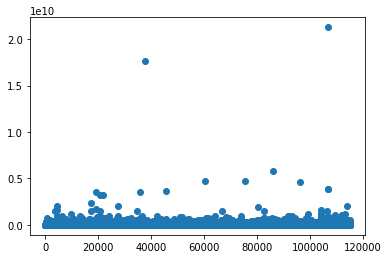

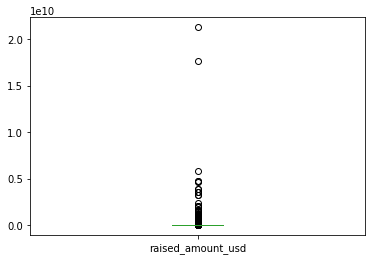

In [425]:
# #remove null values 
# master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]



df=master_frame


#using a scatter plot to see if there are outliers
ser=df.raised_amount_usd
plt.scatter(ser.index, ser)
plt.show()

df.raised_amount_usd.plot.box()
plt.show()

In [426]:
# as you can see there are two values greater than 1.5e+10 that are clearly ourliers

# now invetigatng the difference between percenile
master_frame.raised_amount_usd.quantile(q=[0.97,0.98,0.99,1])

0.97      44000000.00
0.98      60000000.00
0.99     100000000.00
1.00   21271935000.00
Name: raised_amount_usd, dtype: float64

In [427]:
# now lets see how many records are greater than 98th quatile
master_frame[master_frame.raised_amount_usd>master_frame.raised_amount_usd.quantile(q=0.99)]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
153,/organization/1c-company,1C Company,Games|Software|Video Games,closed,RUS,/funding-round/679ae989d9dd8195e989dda21eff44b7,private_equity,03-10-2011,200000000.00
228,/organization/21e6,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,/funding-round/b58f3c0c3f9747ecb9c76b106ca211e5,venture,10-03-2015,116000000.00
231,/organization/21st-century-oncology,21st Century Oncology,Health and Wellness,operating,USA,/funding-round/261bff457e1b31c4879e786ab7cf80ab,private_equity,26-09-2014,325000000.00
236,/organization/21vianet,21viaNet,Software|Web Hosting,ipo,CHN,/funding-round/8890faf6c63a59e570ff3a2268994376,venture,04-12-2014,296000000.00
253,/organization/23andme,23andMe,Biotechnology|Search,operating,USA,/funding-round/cf66108828b7b22e45bbe02cf8a9fc50,venture,03-07-2015,115000000.00
...,...,...,...,...,...,...,...,...,...
114131,/organization/zhaopin,Zhaopin,Curated Web|Internet,operating,CHN,/funding-round/5bdcf1ada9cdcef1ab6fa03e357460f8,debt_financing,13-07-2008,110000000.00
114479,/organization/zocdoc,ZocDoc,Dental|Doctors|Health and Wellness|Health Care,operating,USA,/funding-round/587d42d9d071fef639b0acf3d9635a20,venture,20-08-2015,130000000.00
114805,/organization/zuora,Zuora,Billing|SaaS|Software,operating,USA,/funding-round/fd20960c206d492ea2c2c7f21289c1e8,venture,11-03-2015,115000000.00
114911,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,/funding-round/a6ebc53cf3c0c97d1cdd075f6bbf31fa,venture,18-02-2011,490000000.00


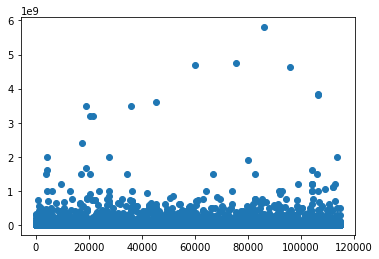

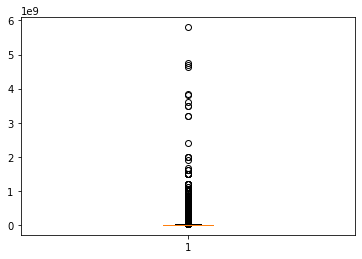

In [428]:
#after looking at the scatter plot, it is clear that the values above 1e+10 are outliers 
#this few outliers that will influce the mean so we will remove those outliers

#removing values above 1e+10 to remove outliers 
master_frame=master_frame[master_frame.raised_amount_usd<int(1e+10)]



#after removing the outliers verifying it with the help of plots

#using a scatter plot to see if there are outliers
ser=master_frame.raised_amount_usd
plt.scatter(ser.index, ser)
plt.show()
# using box plot to check the range of data
ser=master_frame.raised_amount_usd
plt.boxplot( ser)
plt.show()


######Now that the major outliers are removed and data cleaned, we can calculate the average which can be more representative

funding_round_type  angel  convertible_note  ...  undisclosed  venture
raised_amount_usd    1.00              1.00  ...         7.00    11.00

[1 rows x 14 columns]


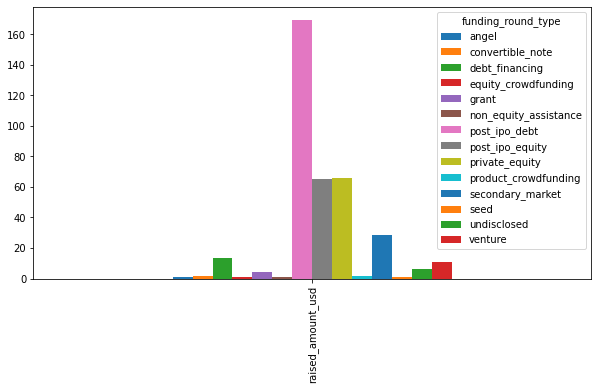

In [429]:
# Analysing througout all sectors
pivot=pd.pivot_table(master_frame,values='raised_amount_usd',columns='funding_round_type',aggfunc='mean')
pivot=pivot.apply(lambda a : a/1000000,axis=1)  
pivot.plot.bar(figsize=(10,5))


print(round(pivot))

funding_round_type      angel  private_equity      seed     venture
raised_amount_usd  1104671.00     65675409.00 936292.00 10572376.00


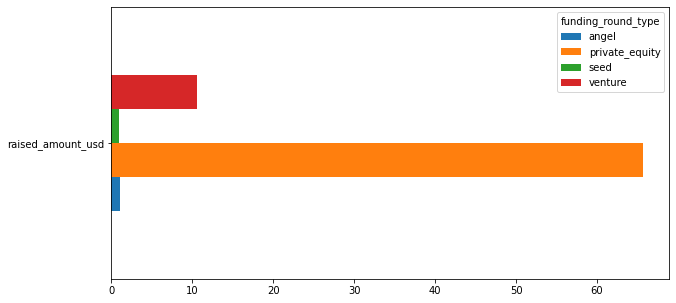

In [430]:
#Analysing the four fund types ['private_equity','venture','seed','angel']


master_frame.funding_round_type.unique()
fundtypes=np.array(['private_equity','venture','seed','angel'])
subset=master_frame[master_frame.funding_round_type.isin(fundtypes)]
pivot=pd.pivot_table(subset,values='raised_amount_usd',columns='funding_round_type',aggfunc=np.mean)
print(round(pivot))
pivot=pivot.apply(lambda a : a/1000000,axis=1)
pivot.plot.barh(figsize=(10,5))

As per the requirement of Spark funds to to invest between 5 to 15 million USD per investment round it is clear to that best suitable fund type is **venture**

##### Table 2.1 sl .no 5

As per the graph above the most invested funding round type is **Venture**.

In [431]:
#before making any changeg maintaining a backup
bkb_master_frame=master_frame

#filter data so it has only the chosen fund type
before=master_frame.size

#filter venture fundings
master_frame=master_frame[master_frame.funding_round_type=='venture']



#removing nulls
master_frame=master_frame[~master_frame.country_code.isnull()]
master_frame=master_frame[~master_frame.category_list.isnull()]

after=master_frame.size
res=before-after
print('before filteration row count was ',before,' after filteration row count is ',after,' total loss ',res,' rows')

before filteration row count was  940770  after filteration row count is  468207  total loss  472563  rows


#Check Point 3 ( Country Analysis )

Now we will analyze the top 9 countries with the most investment recieved.

              raised_amount_usd
country_code                   
USA                405981977843
CHN                 40184215806
GBR                 20449247468
IND                 14538793033
CAN                  9625061103
FRA                  7326001501
ISR                  7040887198
DEU                  6674953890
JPN                  3233187056


<Figure size 360x360 with 0 Axes>

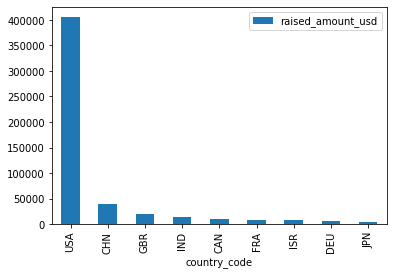

In [432]:
top9=master_frame.groupby(['country_code']).agg({'raised_amount_usd': "sum"}).sort_values(by='raised_amount_usd',ascending=False).head(9)
top9.raised_amount_usd=top9.raised_amount_usd.apply(lambda x:round(x))
res=top9.apply(lambda a : a/1000000,axis=1)
print( top9 )

plt.figure(figsize=(5,5))
res.plot.bar()
plt.show()


#rough code
#master_frame[grp]
#.sort(['raised_amount_usd'], ascending=[0]).head(9)
#top9=pd.pivot_table(master_frame,values='raised_amount_usd',index='country_code',aggfunc='sum')
#top9#.sort(['raised_amount_usd'], ascending=[0])

##### Table 3.1 sl .no 1,2,3

Now that we have the top 9 countries with most investment we are going to find the top 3 english countries

              raised_amount_usd
country_code                   
USA                405981977843
GBR                 20449247468
IND                 14538793033


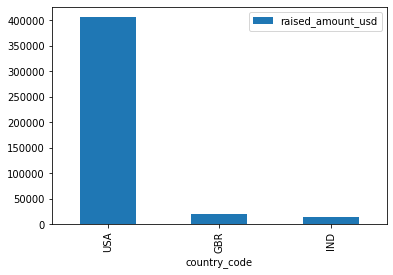

In [433]:
#this list is referred from wiki link https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
englishcountries=np.array(['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE'])
top3=top9[top9.index.isin(englishcountries)].sort_values(by='raised_amount_usd',ascending=False).head(3)
res=top3.apply(lambda a : a/1000000,axis=1)
res.plot.bar()
print(top3)

#Checkpoint 4 ( Sector Analysis 1 )

##Loading the mapping file and understanding the data

In [434]:
mapping_df=pd.read_csv(r'https://cdn.upgrad.com/UpGrad/temp/231dc91c-0642-470d-a362-29ddcd7142ce/mapping.csv', encoding= 'palmos')
#master_frame[master_frame.category_list.str.contains('Application Platforms')]

#removing null categories from both mapping and master 
mapping_df=mapping_df[~mapping_df.category_list.isnull()]
master_frame=master_frame[~master_frame.category_list.isnull()]

mapping_df.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [435]:
#checing null values
print(mapping_df.category_list.isnull().sum())
print(master_frame.category_list.isnull().sum())

0
0


In [436]:
#checking for data ambiguity
master_frame.category_list[master_frame.category_list.str.contains('Application Platforms')].unique()

array(['Application Platforms|Real Time|Social Network Media',
       'Application Platforms|Development Platforms|Mass Customization',
       'Application Platforms|Communications Infrastructure|Storage',
       'Ad Targeting|Advertising|Application Platforms',
       'Application Platforms|Internet|Services',
       'Application Platforms|Business Productivity|Cloud Computing|Collaboration|Enterprise Software|Mobile|Mobile Enterprise|Social Business|Software|Web Development|Web Tools',
       'Application Platforms|Internet|Software', 'Application Platforms',
       'Application Platforms|Enterprises|Systems',
       'Application Platforms|Brand Marketing|Communications Infrastructure|Enterprise Software|Mobile Software Tools|Social Media',
       'Application Platforms|Medical|Services',
       'Application Platforms|Artificial Intelligence|Developer Tools|Development Platforms|EdTech|Operating Systems',
       'Application Platforms|Data Centers|Software',
       'Analytics|Applica

In [437]:
#after getting the business rule that the first string before the vertical bar will be considered the primary sector

#applying that logic to master_dataframe

master_frame['primary_sector']=master_frame.category_list.apply(lambda x:x.split('|')[0])

#verifying
master_frame.primary_sector[master_frame.category_list.str.contains('|')].unique()

array(['Media', 'Application Platforms', 'Curated Web', 'Software',
       'Biotechnology', 'Analytics', 'Apps', 'Education', 'Beauty',
       'Local Businesses', 'Cosmetics', 'Games', 'Hospitality',
       'Health Care', 'Social Travel', 'Enterprise Software',
       'E-Commerce', 'Service Providers', 'Mobile', 'Manufacturing',
       'Advertising', 'Public Transportation', 'Internet', 'Travel',
       'Finance', 'Cars', 'Clean Technology', 'Health and Wellness',
       'News', 'Art', 'Big Data', 'Customer Service', 'EdTech',
       'Computers', 'Services', 'Cloud Computing', 'Ad Targeting',
       'Credit Cards', 'Hardware + Software', 'Internet of Things',
       'Cloud Infrastructure', 'SaaS', 'Messaging',
       'Information Technology', 'Consumer Electronics', 'Data Centers',
       'Point of Sale', 'Artificial Intelligence', 'Android',
       'Enterprises', 'Blogging Platforms', 'Project Management',
       '3D Technology', '3D', '3D Printing', 'Drones', 'Technology',
       'Au

##using mapping file to merge the data

In [438]:

#Cleaning the mapping file to be able to merge it.

#droping blank column as it is not muc in use in the long run
mapping_df=mapping_df.drop('Blanks',axis=1)

#now defing a funtion that will provid us main_sector by the category list in mapping file.
columnList=mapping_df.columns[1:]

# def getMainSector(x):
#   x=np.array(x)
#   sect=np.array(columnList)
#   return sect[int(np.where(x==1)[0])]

# mapping_df['main_sector']=mapping_df[columnList].apply(lambda x:getMainSector(x),axis=1)
# mapping_df=mapping_df.drop(columns=columnList)

#there is another approch with melt functionas below in pandas that i am aware of but building a custom function was easy
mapping_df=pd.melt(mapping_df,id_vars=['category_list'],value_vars=mapping_df.columns[1:],var_name='main_sector')
mapping_df = mapping_df[~(mapping_df.value == 0)]
mapping_df = mapping_df.drop(['value'],axis=1)

In [439]:
mapping_df.head(5)
mapping_df.main_sector.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: main_sector, dtype: int64

In [440]:
#drop the uneccessary columns
mapping_df=mapping_df.rename(columns={'category_list':'primary_sector'})
mapping_df.head(5)

,primary_sector,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


Now that we have a proper column that can be mapped we can begin with merging

In [441]:
# #standardize the columns
master_frame.primary_sector=master_frame.primary_sector.apply(lambda x: x.lower())
mapping_df.primary_sector=mapping_df.primary_sector.apply(lambda x: x.lower())

#begin with merge
master_frame=pd.merge(master_frame,mapping_df,on='primary_sector')

print(master_frame.info())
#print(master_frame[master_frame.category_list.str.len()>50].head(5))
master_frame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48575 entries, 0 to 48574
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                48575 non-null  object 
 1   name                     48575 non-null  object 
 2   category_list            48575 non-null  object 
 3   status                   48575 non-null  object 
 4   country_code             48575 non-null  object 
 5   funding_round_permalink  48575 non-null  object 
 6   funding_round_type       48575 non-null  object 
 7   funded_at                48575 non-null  object 
 8   raised_amount_usd        48575 non-null  float64
 9   primary_sector           48575 non-null  object 
 10  main_sector              48575 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.4+ MB
None


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,Entertainment


#Checkpoint 5 ( Sector Analysis 2 )

Before proceeding with sector analysis we will clean data as below

In [442]:

# master dataframe should only have funding_round_type as venture this was already handled in the previouse stage

before=len(master_frame.index)

# master datframe should only have top 3 most invested countries

master_frame_filterd=master_frame[master_frame.country_code.isin(top3.index)]

# master datafarme range of funding preferred by Spark Funds is 5 to 15 million USD. 

master_frame_filterd=master_frame_filterd[(master_frame_filterd.raised_amount_usd>=5000000) &(master_frame_filterd.raised_amount_usd<=15000000)]

after=len(master_frame_filterd.index)
res=before-after
print('before filteration row count was ',before,' after filteration row count is ',after,' total loss ',res,' rows')

#rough code
#master_frame_filterd.groupby(['country_code', 'primary_sector']).raised_amount_usd.agg({'raised_amount_usd':'sum'}).plot.bar()

before filteration row count was  48575  after filteration row count is  12025  total loss  36550  rows


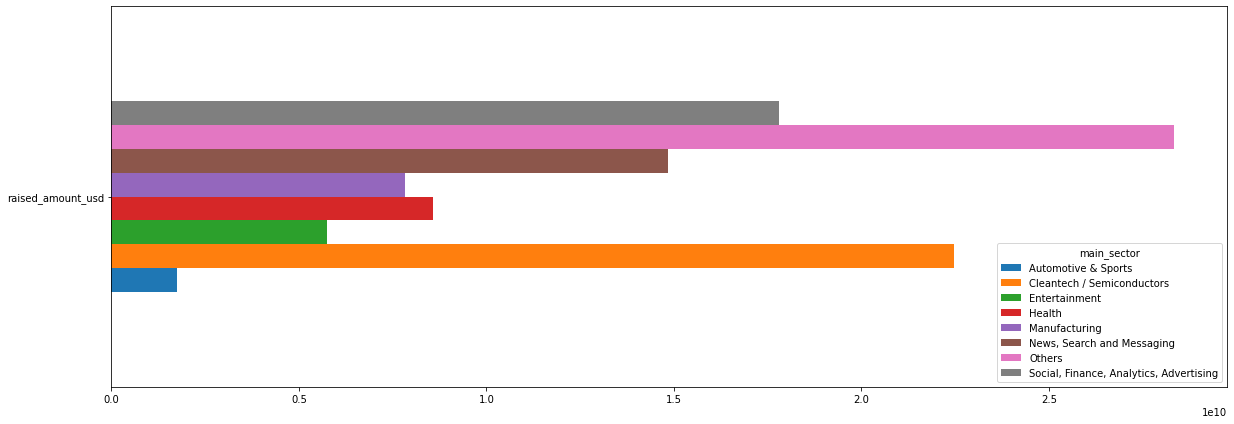

In [443]:
#this graph is just to get an idea about investments in main sector.
sub=pd.pivot_table(master_frame_filterd,columns='main_sector',values='raised_amount_usd',aggfunc='sum').plot.barh(figsize=(20,7))
plt.show()


Now that we are ready with the data to be analysed further. we will split data into 3 dataframe d1,d2,d3 to analyse each top contries individually

In [444]:

# splitting the data
d1 = master_frame_filterd[master_frame_filterd.country_code==top3.index[0]]
d1 = d1.assign(count_of_invest =d1.groupby('main_sector')['main_sector'].transform('count'))
d1 = d1.assign(sum_of_invest =d1.groupby('main_sector')['raised_amount_usd'].transform('sum'))
d2 = master_frame_filterd[master_frame_filterd.country_code==top3.index[1]]
d2 = d2.assign(count_of_invest =d2.groupby('main_sector')['main_sector'].transform('count'))
d3 = d2.assign(sum_of_invest =d2.groupby('main_sector')['raised_amount_usd'].transform('sum'))
d3 = master_frame_filterd[master_frame_filterd.country_code==top3.index[2]]
d3 = d3.assign(count_of_invest =d3.groupby('main_sector')['main_sector'].transform('count'))
d3 = d3.assign(sum_of_invest =d3.groupby('main_sector')['raised_amount_usd'].transform('sum'))

#just to verify that the result is correct
d1[['main_sector','count_of_invest','sum_of_invest']].tail(10)

,main_sector,count_of_invest,sum_of_invest
48515,Others,2923,26089280296.00
48517,Health,908,8200859357.00
48518,Health,908,8200859357.00
48520,Health,908,8200859357.00
48546,"Social, Finance, Analytics, Advertising",1912,16680695048.00
48547,"Social, Finance, Analytics, Advertising",1912,16680695048.00
48550,"Social, Finance, Analytics, Advertising",1912,16680695048.00
48561,Others,2923,26089280296.00
48565,Others,2923,26089280296.00
48569,Others,2923,26089280296.00


##### Table 5.1 sl .no 1 total number of investment

In [445]:
print('total number of investment in d1 ({0}) are '.format(top3.index[0]),len(d1.index))
print('total number of investment in d2 ({0}) are '.format(top3.index[1]),len(d2.index))
print('total number of investment in d3 ({0}) are '.format(top3.index[2]),len(d3.index))

total number of investment in d1 (USA) are  11149
total number of investment in d2 (GBR) are  577
total number of investment in d3 (IND) are  299


##### Table 5.1 sl .no 2 total amount of investment

In [446]:
print('total amount of investment in d1 ({0}) are '.format(top3.index[0]),d1.raised_amount_usd.sum())
print('total amount of investment in d2 ({0}) are '.format(top3.index[1]),d2.raised_amount_usd.sum())
print('total amount of investment in d3 ({0}) are '.format(top3.index[2]),d3.raised_amount_usd.sum())

total amount of investment in d1 (USA) are  99661524549.0
total amount of investment in d2 (GBR) are  5028704358.0
total amount of investment in d3 (IND) are  2683537552.0


##### Table 5.1 sl .no 3 ,4 and 5 Top Sector Name

In [447]:
print('\n D1 ({0}) \n'.format(top3.index[0]),d1.main_sector.value_counts().head(3))
print('\n D2 ({0}) \n'.format(top3.index[1]),d2.main_sector.value_counts().head(3))
print('\n D3 ({0}) \n'.format(top3.index[2]),d3.main_sector.value_counts().head(3))

#rough code
#pd.pivot_table(d1,values='main_sector',columns,aggfunc=len)
#d1.to_csv('test.csv')


 D1 (USA) 
 Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: main_sector, dtype: int64

 D2 (GBR) 
 Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: main_sector, dtype: int64

 D3 (IND) 
 Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: main_sector, dtype: int64


##### Table 5.1 sl .no 6 number of Investment in top Sector Name

In [448]:
print('total number of investment in d1 ({0}) are '.format(top3.index[0]),len(d1[d1.main_sector=='Others'].index))
print('total number of investment in d2 ({0}) are '.format(top3.index[1]),len(d2[d2.main_sector=='Others'].index))
print('total number of investment in d3 ({0}) are '.format(top3.index[2]),len(d3[d3.main_sector=='Others'].index))

total number of investment in d1 (USA) are  2923
total number of investment in d2 (GBR) are  143
total number of investment in d3 (IND) are  109


##### Table 5.1 sl .no 7 number of Investment in second top Sector Name

In [449]:
print('total number of investment in d1 ({0}) are '.format(top3.index[0]),len(d1[d1.main_sector=='Cleantech / Semiconductors'].index))
print('total number of investment in d2 ({0}) are '.format(top3.index[1]),len(d2[d2.main_sector=='Cleantech / Semiconductors'].index))
print('total number of investment in d3 ({0}) are '.format(top3.index[2]),len(d3[d3.main_sector=='News, Search and Messaging'].index))

total number of investment in d1 (USA) are  2297
total number of investment in d2 (GBR) are  127
total number of investment in d3 (IND) are  52


##### Table 5.1 sl .no 8 number of Investment in third top Sector Name

In [450]:
print('total number of investment in d1 ({0}) are '.format(top3.index[0]),len(d1[d1.main_sector=='Social, Finance, Analytics, Advertising'].index))
print('total number of investment in d2 ({0}) are '.format(top3.index[1]),len(d2[d2.main_sector=='Social, Finance, Analytics, Advertising'].index))
print('total number of investment in d3 ({0}) are '.format(top3.index[2]),len(d3[d3.main_sector=='Entertainment'].index))

total number of investment in d1 (USA) are  1912
total number of investment in d2 (GBR) are  98
total number of investment in d3 (IND) are  33


Which companies recieved the hieghest investment as per the leading sectors

In [451]:
print("Companies which recieved heighest investment By Top sector")
print(d1[d1.main_sector=='Others'].groupby('permalink').agg({'raised_amount_usd': "sum"}).sort_values('raised_amount_usd', ascending = False).head(1))
print(d2[d2.main_sector=='Others'].groupby('permalink').agg({'raised_amount_usd': "sum"}).sort_values('raised_amount_usd', ascending = False).head(1))
print(d3[d3.main_sector=='Others'].groupby('permalink').agg({'raised_amount_usd': "sum"}).sort_values('raised_amount_usd', ascending = False).head(1))

Companies which recieved heighest investment By Top sector
                           raised_amount_usd
permalink                                   
/organization/virtustream        64300000.00
                              raised_amount_usd
permalink                                      
/organization/electric-cloud        37000000.00
                            raised_amount_usd
permalink                                    
/organization/firstcry-com        39000000.00


In [452]:

print("Companies which recieved heighest investment By Second sector")
print(d1[d1.main_sector=='Cleantech / Semiconductors'].groupby('permalink').agg({'raised_amount_usd': "sum"}).sort_values('raised_amount_usd', ascending = False).head(1))
print(d2[d2.main_sector=='Cleantech / Semiconductors'].groupby('permalink').agg({'raised_amount_usd': "sum"}).sort_values('raised_amount_usd', ascending = False).head(1))
print(d3[d3.main_sector=='News, Search and Messaging'].groupby('permalink').agg({'raised_amount_usd': "sum"}).sort_values('raised_amount_usd', ascending = False).head(1))

Companies which recieved heighest investment By Second sector
                        raised_amount_usd
permalink                                
/organization/biodesix        75300000.00
                           raised_amount_usd
permalink                                   
/organization/eusa-pharma        35600000.00
                                                raised_amount_usd
permalink                                                        
/organization/gupshup-technology-india-pvt-ltd        33000000.00


#Checkpoint 6 ( plots )

##### Plot 1. (Global investment in selected four types of round type)

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.



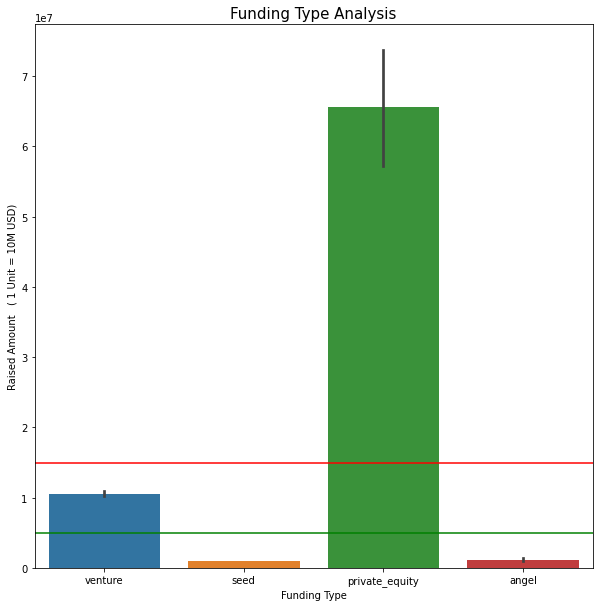

In [453]:
# bar plot with default statistic=mean
plt.figure(figsize=(10,10))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=bkb_master_frame[bkb_master_frame.funding_round_type.isin(fundtypes)])
g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =15)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

As you can see above the type venture is between 5 to 15 millions which is why we have selected it for analysis

##### Plot 2. (top 9 countries against the total amount of investments in Venture)

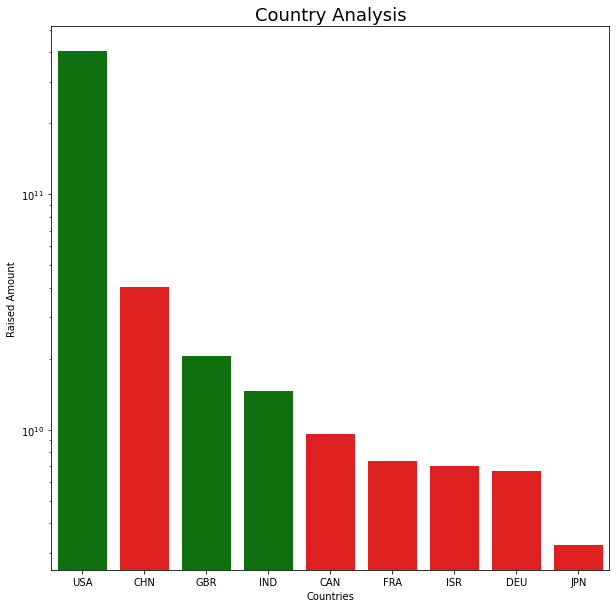

In [454]:

top9['country']=top9.index

custom_palette = {}
for q in set(top9.country):
    if q in top3.index:
        custom_palette[q] = 'g'
    else:
        custom_palette[q] = 'r'



# bar plot 
plt.figure(figsize=(10,10))
c=sns.barplot(x='country', y='raised_amount_usd', data=top9, estimator=np.sum, palette=custom_palette)
c.set_yscale('log')
c.set(xlabel='Countries', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

#roungh code
# data=bkb_master_frame[(bkb_master_frame.funding_round_type=='venture')&(bkb_master_frame.country_code.isin(top9.index))]
# data.groupby(by='country_code',as_index=False).agg({'raised_amount_usd': "sum"})

As you can see out of the top 9 countries the top 3 english speaking countries are in green

##### Plot 3. (investments in the top 3 sectors of the top 3 countries on one chart)

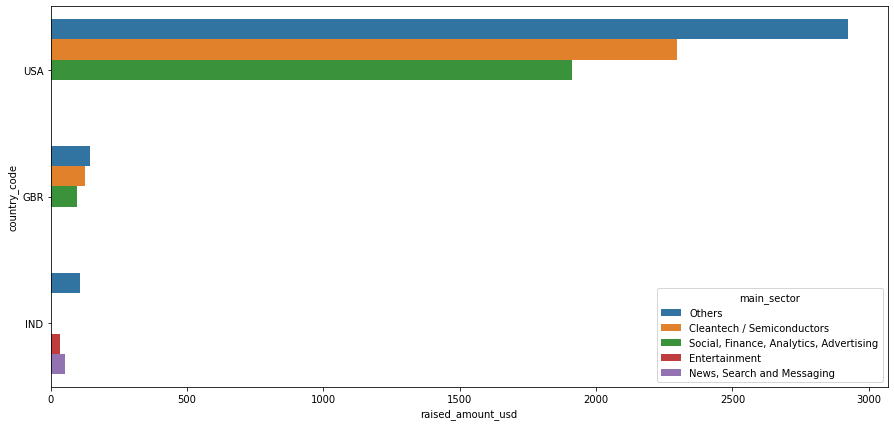

In [455]:
p1=d1[d1.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
p2=d2[d2.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
p3=d3[d3.main_sector.isin(['Others','News, Search and Messaging', 'Entertainment'])]
frames = [p1, p2, p3]
result = pd.concat(frames)
plt.figure(figsize=(15, 7))

# as there is no estimator for count, using a lambda expression to achive this
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=result,estimator=lambda x: len(x) )
plt.show()